In [112]:
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt

In [2]:
# define fitness function
def sphere_function(chromosome):
    # evaluate the fitness of a chromosome for the sphere function
    fitness = sum([gene**2 for gene in chromosome])
    return fitness

def rastrigin_function(chromosome):
    # evaluate the fitness of a chromosome for the Rastrigin function
    A = 10
    fitness = A * len(chromosome) + sum([gene**2 - A * math.cos(2 * math.pi * gene) for gene in chromosome])
    return fitness

def satria_function(chromosome):
    A = 10
    fitness = A - (A * sum([gene**2 for gene in chromosome]))
    return fitness

def function_f6(chromosome):
    fitness = sum([math.pow(gene+0.5,2) for gene in chromosome])
    return fitness

def griewank(x):
    d = len(x)
    s = np.sum(x**2)
    p = np.prod(np.cos(x / np.sqrt(np.arange(1, d+1))))
    return 1 + s/4000 - p

In [103]:
def slime_mould_algorithm(n_slimes, dim, n_iterations, xmin, xmax, z=0.5, fitness_function=sphere_function, obj='min'):
    isDescendingOrder=True
    if obj=='min':
        isDescendingOrder = False
    track_fitness = []
    # Tahap 1: inisialisasi posisi dari slime moulds dalam rentang search space
    slimeMoulds = np.zeros((n_slimes, dim))
    for i in range(n_slimes):
        slimeMoulds[i] = np.array([rd.uniform(xmin, xmax) for d in range(dim)])
        
    # Tahap 2: Optimasi SMA
    for iteration in range(n_iterations):
        # Check the slime moulds positions boundaries
        for idx_slime in range(n_slimes):
            slimeMoulds[idx_slime] = np.clip(slimeMoulds[idx_slime], xmin, xmax)
            
        # Tahap 3: Hitung nilai fitness dari semua slime moulds
        fitness_scores = np.array([fitness_function(slime) for slime in slimeMoulds])
        
        # Tahap 4: Tentukan slime dengan fitness teroptimal
        if obj == 'min':
            slime_best_position = slimeMoulds[fitness_scores.argmin()][:]
            slime_best_value = fitness_scores.min()
            slime_worst_value = fitness_scores.max()
        else:
            slime_best_position = slimeMoulds[fitness_scores.argmax()][:]
            slime_best_value = fitness_scores.max()
            slime_worst_value = fitness_scores.min()
        
        print(f"Best Fitness = [{slime_best_value}]")
        track_fitness.append(slime_best_value)

        # Tahap 5: Hitung W
        WeightVector = []
        ## sort slime moulds base on their fitness values
        ## if minimization then ascending order, else descending order
        slimeMouldsWithFitness = list(zip(slimeMoulds, fitness_scores))
        slimeMouldsWithFitness.sort(key=lambda x:x[1], reverse=isDescendingOrder)
        slimeMoulds = [list(slime) for slime, _ in slimeMouldsWithFitness]
        sorted_fitness_scores = [fitness for _, fitness in slimeMouldsWithFitness]
        for idx_sorted_fitness_scores, fitness_score in enumerate(sorted_fitness_scores):
            inside_log = (slime_best_value-fitness_score)/(slime_best_value-slime_worst_value)
            w = rd.uniform(0,1) * math.log2(inside_log+1)
            if idx_sorted_fitness_scores < math.ceil(n_slimes/2):
                # if S(i) ranks the first half of the population
                w = 1 + w
            else:
                w = 1 - w
            WeightVector.append(w)
        
        # Tahap 6: Updating slime mould position
        for idx_slime, slime_mould in enumerate(slimeMoulds):
            # Tahap 7: update nilai p
            p = math.tanh(abs(fitness_scores[idx_slime]-slime_best_value))
            
            # Tahap 8: update nilai vb dan vc
            a = math.atanh(-(iteration/n_iterations)+np.finfo(float).eps)
            vb = np.array([ rd.uniform(-a,a) for _ in range(dim)])
            vc = np.array([ (1 - (iteration/n_iterations)) for _ in range(dim)])
            
            # Tahap 9: Update position
            r = rd.uniform(0,1)
            if r < p:
                # pick 2 random slime mould from the population
                slime_mould_random1 = np.array(slimeMoulds[np.random.randint(0, n_slimes)])
                slime_mould_random2 = np.array(slimeMoulds[np.random.randint(0, n_slimes)])
                slimeMoulds[idx_slime] = slime_mould + (vb * (WeightVector[idx_slime]*slime_mould_random1 - slime_mould_random2))
            elif r>=p:
                slimeMoulds[idx_slime] = vc * slime_mould
            else:
                rand = rd.random()
                if  rand < z:
                    slimeMoulds[idx_slime] = np.array([rand*(xmax-xmin)+xmin for _ in range(dim)])
    # Tahap End: Return solution
    return track_fitness

In [127]:
n_slimes = 100
dim = 4
n_iterations = 250
xmin = -100
xmax = 100
z = 0.67 # probability used to determine if the SMA will search for the another food source or search around the best current one
fitness_function = sphere_function
obj='min'

In [128]:
track_fitness = slime_mould_algorithm(n_slimes, dim, n_iterations, xmin, xmax, z, fitness_function, obj)

Best Fitness = [2009.161962137065]
Best Fitness = [2009.1619621370648]
Best Fitness = [1993.1208130313623]
Best Fitness = [1961.3584397548943]
Best Fitness = [1914.5682728161014]
Best Fitness = [1853.792217563827]
Best Fitness = [1780.3820457482996]
Best Fitness = [1695.9492076107322]
Best Fitness = [1602.305676163298]
Best Fitness = [1501.398873901238]
Best Fitness = [1395.2439679209247]
Best Fitness = [1285.856840835924]
Best Fitness = [1175.1908576862209]
Best Fitness = [1065.0801750844528]
Best Fitness = [957.1918136690979]
Best Fitness = [852.9880840658251]
Best Fitness = [753.700271080563]
Best Fitness = [660.3137926925968]
Best Fitness = [573.564407863814]
Best Fitness = [493.9444910217909]
Best Fitness = [421.7179517666206]
Best Fitness = [356.9420743752677]
Best Fitness = [299.49438915701467]
Best Fitness = [249.102661215012]
Best Fitness = [205.3761764759737]
Best Fitness = [167.83669743498933]
Best Fitness = [135.94772492234137]
Best Fitness = [109.1410087312544]
Best Fitnes

Best Fitness = [2.197270098553277e-202]
Best Fitness = [1.4062528630741e-206]


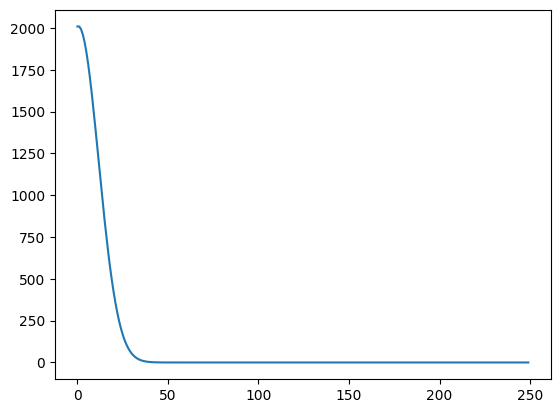

In [129]:
plt.plot(track_fitness)

In [6]:
sorted([1,2,3,4], reverse=False)

[1, 2, 3, 4]

In [56]:
x = [
    [1,2,3],
    [2,3,4],
    [3,4,5],
    [5,6,7]
]
y = [10,9,12,90]
n = 4 # jumlah slime aka panjang dimensi vektor fitness score
zipped = list(zip(x,y))

In [49]:
x[2]

[3, 4, 5]

In [12]:
zipped.sort(key=lambda x:x[1], reverse=True)

In [13]:
list(zipped)

[([5, 6, 7], 90), ([3, 4, 5], 12), ([1, 2, 3], 10), ([2, 3, 4], 9)]

In [31]:
for x, y in zipped:
    print(x, y)

[1, 2, 3] 10
[2, 3, 4] 9
[3, 4, 5] 12
[5, 6, 7] 90


In [23]:
math.ceil(5/2)

3

In [54]:
x = np.array([1,2,3])
y = np.array([2,3,4])
x*y

array([ 2,  6, 12])

In [59]:
for idx_x, val_x in enumerate(x):
    val_x[:] = [1,1,1]

In [97]:
x = np.array([ 0,0,10,10])

In [98]:
x.min()

0